## 3.3 NetCDF Data - How to work with it

Let's do some first, simple analyses with our XArray-Dataset!

In [3]:
# Display the plots in the notebook:
%matplotlib inline

In [4]:
# Import the tools we are going to need today:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary, needed to display world maps
import cartopy.crs as ccrs  # Projections list
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size
np.set_printoptions(threshold=20)  # avoid to print very large arrays on screen
# The commands below are to ignore certain warnings.
import warnings
warnings.filterwarnings('ignore')

In [5]:
dataDIR = './data/ERA5-LowRes-MonthlyAvg-t2m_tp.nc' 
# the path to which you saved the netCDF file in the step before
# Here I downloaded the file in the "data" folder which I placed in the same folder as the notebook --> the dot "." 
# in the beginning means "look in the current foler"

ds = xr.open_dataset(dataDIR) # the data of the netCDF File will be stored in "ds" (dataset)

### Mean of a variable along a certain dimension 

A lot of times, you will want to average your data along a certain dimension axis: Right now the data has three dimensions (latitude, longitude, month). To be able to plot the data (2- or 1-dimensional!), you will need to average over at least one of those three dimensions. This is very easy: there is a method `.mean(dim = 'the_dimension_you_want_to_average_over')` attached to your DataSet variables. So you can just type: `ds.variable_name.mean(dim = '...')`! 

Let's first try to **average over one dimension**, e.g. time. This means, we will get a DataSet of mean sealevel pressure for all the lons and lats, but averaged over the whole period from 1979 to 2019!

In [6]:
t2m_avg = ds.t2m.mean(dim = 'time')
t2m_avg

<xarray.DataArray 't2m' (latitude: 241, longitude: 480)>
array([[259.22702, 259.22702, 259.22702, ..., 259.22702, 259.22702, 259.22702],
       [259.15924, 259.1556 , 259.1519 , ..., 259.16513, 259.16345, 259.16177],
       [259.14075, 259.1378 , 259.13333, ..., 259.14938, 259.1464 , 259.14362],
       ...,
       [227.82396, 227.83562, 227.85133, ..., 227.78581, 227.79881, 227.8117 ],
       [227.16273, 227.17685, 227.19109, ..., 227.09494, 227.12115, 227.14626],
       [227.72874, 227.72874, 227.72874, ..., 227.72874, 227.72874, 227.72874]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -179.625 -178.875 ... 178.875 179.625
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0

As expected, the time coordinate disappears! Instead, we get a new, two-dimensional xarray DataArray of dimensions [latitude, longitude]. We can plot this, to make sure we understood, what the new data looks like:

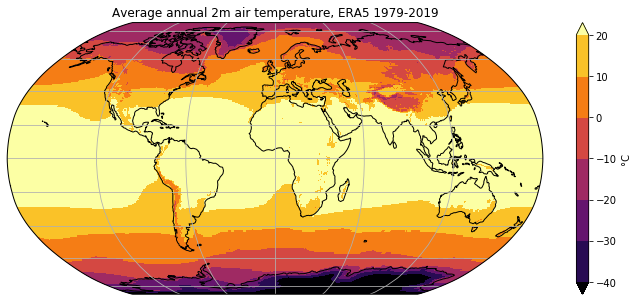

In [7]:
t2_tavg = ds.t2m.mean(dim='time')
t2c_tavg = t2_tavg - 273.15
ax = plt.axes(projection=ccrs.Robinson())
t2c_tavg.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='inferno', center=False, 
              vmin=-40, vmax=20, levels=7, cbar_kwargs={'label':'°C'}) 
ax.set_title('Average annual 2m air temperature, ERA5 1979-2019')
ax.coastlines(); ax.gridlines(); 

We are looking at the mean 2m temperature, expressed in ° Celcius. Such time averages are often written with a bar on top of them:

$\overline{msl} = temporal\_mean(msl)$

Don't worry about plotting right now, we will deal with this later. The plots are just here, to give you a visual understanding of our data.


Let's try the same thing for the longitudinal dimension:

In [8]:
ds.t2m.mean(dim ='longitude') # we are left with two dimensions: the latitudinal coordinate axis and how the TOA
                                    # Shortwave Flux for All-Sky Conditions evolves with time for each latitude

<xarray.DataArray 't2m' (time: 480, latitude: 241)>
array([[244.70677, 244.7573 , 244.98932, ..., 242.52357, 242.68039, 242.92653],
       [241.44603, 241.27147, 241.12598, ..., 234.27542, 234.13408, 234.14551],
       [246.76007, 246.80719, 247.06432, ..., 227.33298, 227.63522, 227.9131 ],
       ...,
       [264.99023, 264.98672, 264.92523, ..., 230.1329 , 229.86736, 229.98761],
       [255.91656, 255.77608, 255.2397 , ..., 236.09732, 236.06686, 236.23946],
       [251.5613 , 251.39014, 250.85432, ..., 248.57254, 248.96458, 249.3264 ]],
      dtype=float32)
Coordinates:
  * latitude  (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time      (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01

You can also build the **average over two dimensions:**

In [9]:
ds.t2m.mean(dim = ['time', 'longitude'])

<xarray.DataArray 't2m' (latitude: 241)>
array([259.22717, 259.2433 , 259.28152, ..., 227.72784, 227.64238, 227.72879],
      dtype=float32)
Coordinates:
  * latitude  (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0

In [10]:
zonal_t2m_avg = ds.t2m.mean(dim = 'time').mean(dim = 'longitude') # this gives the same output as the command above!

This leaves us with only the meridional component of our dataset, which means we calculated the average over time and all longitudes for each latitude. This is also called the "zonal average".

**"Zonal average"** means "along a latitude circle". It is often writen with ``[]`` or ``<>`` in formulas:

$\left[ \overline{msl} \right] = zonal\_mean(temporal\_mean(msl))$

Note that the two operators are commutative, i.e.:

$\left[ \overline{msl} \right] = \overline{\left[ msl \right]}$


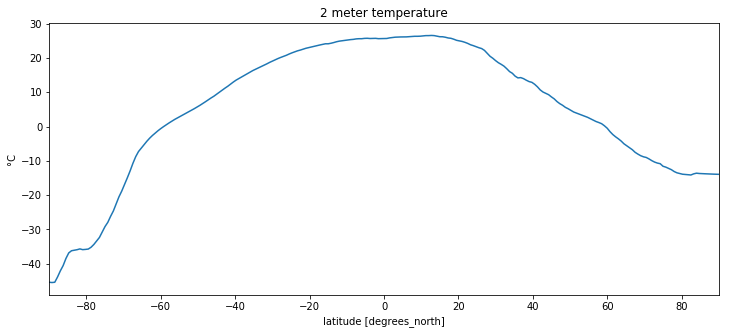

In [11]:
ds_zavg = ds.t2m.mean(dim=['time', 'longitude'])
t2m_zavg = ds_zavg - 273.15
t2m_zavg.plot();
plt.xlim([-90, 90]);
plt.title('2 meter temperature');
plt.ylabel('°C');

If you do not specify, over which dimension you want to average, you will get the **average over all your dimensions**. The result of this will be a scalar: The mean sealevel pressure over all longitudes, latitudes and over the whole year.

In [12]:
ds.t2m.mean()

<xarray.DataArray 't2m' ()>
array(278.35043, dtype=float32)

So the msl over all longitudes, latitudes and over the whole year is 278.36!
Well, this means we have an average temperature of ca. 5° Celcius on our planet earth. That is obviously way to cold: the global average air temperature at the Earth surface is about 14°C . 
The error is due to the fact that we averaged over latitudes!

### Averaging over Latitudes

Whenever you **average over latitudes**, you will need to **take into account that our planet is a sphere** and do arithmetics before you calculate the average. **Otherwise** you will get **wrong results**! Go to chapter 08_AveragingoverSphere, to see how this works. 

### Maxima and Minima

You might not only want to calculate an average of your dataset. You can for example also calculate the **minimum** or **maximum** value of your dataset! Let's try it: 

In [13]:
ds_min = ds.t2m.min()
ds_max = ds.t2m.max()
print(ds_min-273.15)
print(ds_max-273.15)

<xarray.DataArray 't2m' ()>
array(-73.210425)
<xarray.DataArray 't2m' ()>
array(42.29519)


As for the average, you can also search for a **minimum or maximum value along a certain axis**:

In [14]:
ds.t2m.min(dim = 'longitude') - 273.15

<xarray.DataArray 't2m' (time: 480, latitude: 241)>
array([[-28.443253, -28.949097, -29.06015 , ..., -32.363174, -31.874939,
        -30.223434],
       [-31.70398 , -32.42134 , -32.92543 , ..., -41.997314, -41.153046,
        -39.004486],
       [-26.389877, -26.881622, -27.191833, ..., -49.005234, -46.255646,
        -45.236893],
       ...,
       [ -8.15976 ,  -8.468201,  -8.984619, ..., -44.7892  , -44.161728,
        -43.162354],
       [-17.233383, -17.742767, -19.209213, ..., -38.914597, -38.12674 ,
        -36.91057 ],
       [-21.588669, -22.217896, -23.278961, ..., -26.358139, -25.334106,
        -23.823593]], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time      (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01

This gives me the minimum values  of all longitudes for each latitude and each month. 

Let's also have a look at the minimum values of all longitudes and all year, for each latitude:

In [15]:
ds.t2m.min(dim = ['longitude', 'time']) - 273.15

<xarray.DataArray 't2m' (latitude: 241)>
array([-31.70398 , -32.42134 , -32.92543 , ..., -63.532227, -62.21559 ,
       -60.92717 ], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0

There are more methods attached to the DataSet variables: e.g. [standard deviation](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.std.html),...

### Data Selection based on the Coordinate Axes

We cannot only average over dimensions, but also select some fix value of a specific axis, e.g. a certain longitude and latitude!

One of the things we'd also like to do is **select** certain years, which is an easy task with xarray and the method `.sel()`:

In [16]:
ds_avg_lon = ds.t2m.mean(dim ='longitude')
ds_avg_lon.sel(time = '2008') # select the year 2008

<xarray.DataArray 't2m' (time: 12, latitude: 241)>
array([[246.47633, 246.5124 , 246.69261, ..., 242.46532, 242.6365 , 242.79442],
       [249.47443, 249.39809, 249.21947, ..., 233.84114, 233.5739 , 233.77538],
       [249.61188, 249.4821 , 249.19014, ..., 224.5494 , 223.8829 , 223.8504 ],
       ...,
       [257.3408 , 257.29352, 257.30637, ..., 225.65157, 225.05992, 224.98903],
       [255.86375, 255.75313, 255.44353, ..., 236.10463, 236.22047, 236.43854],
       [251.50316, 251.45404, 251.38924, ..., 245.50833, 246.09738, 246.60675]],
      dtype=float32)
Coordinates:
  * latitude  (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time      (time) datetime64[ns] 2008-01-01 2008-02-01 ... 2008-12-01

In [17]:
ds_avg_lon_08 = ds.t2m.mean(dim = 'longitude').sel(time = '2008')
# You can also do both, the averaging and the selection in just one step! The result is the same.
# this is possible for all kinds of methods attached to our dataset ds. If you want to plot in the same step, just 
# attach .plot()!
# Anyway, to keep everything ordered, it is sometimes better to do it in single steps than to create one veeeeery long
# command that nobody understands lateron.

Let's see what we have created:

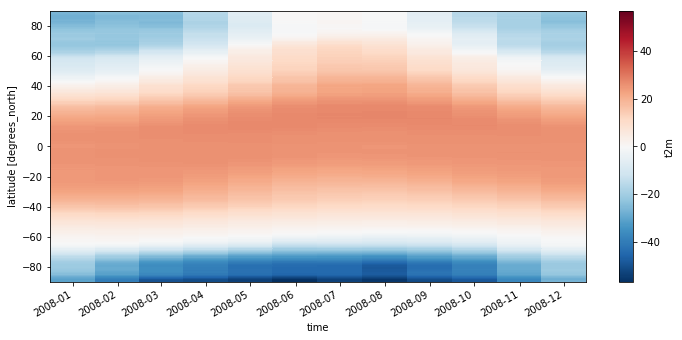

In [18]:
ds_avg_lon_08 = ds_avg_lon_08 - 273.15;
ds_avg_lon_08.T.plot()
plt.ylim([-90, 90]);


In [19]:
ds.t2m.sel(time = "2006-12") # we can even select a special month of a year, this makes the time coordinate vanish

<xarray.DataArray 't2m' (time: 1, latitude: 241, longitude: 480)>
array([[[244.99051, 244.99051, ..., 244.99051, 244.99051],
        [245.03105, 245.02225, ..., 245.04515, 245.03987],
        ...,
        [243.35486, 243.37955, ..., 243.30904, 243.33195],
        [244.48466, 244.48466, ..., 244.48466, 244.48466]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -179.625 -178.875 ... 178.875 179.625
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 2006-12-01
Attributes:
    units:      K
    long_name:  2 metre temperature

In [20]:
ds.t2m.sel(time = slice('1999','2006')) # or select a series of years, with a slice object!

<xarray.DataArray 't2m' (time: 96, latitude: 241, longitude: 480)>
array([[[247.32767, 247.32767, ..., 247.32767, 247.32767],
        [246.66495, 246.65437, ..., 246.67728, 246.672  ],
        ...,
        [246.62265, 246.6385 , ..., 246.59268, 246.60678],
        [247.64493, 247.64493, ..., 247.64493, 247.64493]],

       [[245.95287, 245.95287, ..., 245.95287, 245.95287],
        [245.8154 , 245.81715, ..., 245.80128, 245.80835],
        ...,
        [234.21072, 234.2301 , ..., 234.16489, 234.18958],
        [234.69366, 234.69366, ..., 234.69366, 234.69366]],

       ...,

       [[251.94203, 251.94203, ..., 251.94203, 251.94203],
        [251.82394, 251.8169 , ..., 251.83276, 251.831  ],
        ...,
        [235.96623, 235.98209, ..., 235.92744, 235.94861],
        [237.26347, 237.26347, ..., 237.26347, 237.26347]],

       [[244.99051, 244.99051, ..., 244.99051, 244.99051],
        [245.03105, 245.02225, ..., 245.04515, 245.03987],
        ...,
        [243.35486, 243.37955, ..., 243.30904, 243.33195],
        [244.48466, 244.48466, ..., 244.48466, 244.48466]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -179.625 -178.875 ... 178.875 179.625
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 1999-01-01 1999-02-01 ... 2006-12-01
Attributes:
    units:      K
    long_name:  2 metre temperature

**Note**: in the code above, we used new python syntax! The **slice** object. A slice object is used for indexing in python and always conists of three parameters: start, stop, step. The start value gives python the index, where it should start selecting the data, stop where it should stop and step, in which steps the data should be indexed. Step is 1 by default. We can also set it to another value, e.g. 2: 

In [21]:
t2m_selection = ds.t2m.sel(time = slice('1999', '2006', 2)) # select the values of the years 1999-2006 in steps of 2 
                                                            # --> only every second month!
t2m_selection

<xarray.DataArray 't2m' (time: 48, latitude: 241, longitude: 480)>
array([[[247.32767, 247.32767, ..., 247.32767, 247.32767],
        [246.66495, 246.65437, ..., 246.67728, 246.672  ],
        ...,
        [246.62265, 246.6385 , ..., 246.59268, 246.60678],
        [247.64493, 247.64493, ..., 247.64493, 247.64493]],

       [[247.64845, 247.64845, ..., 247.64845, 247.64845],
        [247.26422, 247.26422, ..., 247.25716, 247.26068],
        ...,
        [224.72816, 224.73698, ..., 224.70877, 224.72464],
        [224.50432, 224.50432, ..., 224.50432, 224.50432]],

       ...,

       [[267.32916, 267.32916, ..., 267.32916, 267.32916],
        [267.11942, 267.12292, ..., 267.11588, 267.11765],
        ...,
        [216.64685, 216.65742, ..., 216.59573, 216.63275],
        [216.34897, 216.34897, ..., 216.34897, 216.34897]],

       [[251.94203, 251.94203, ..., 251.94203, 251.94203],
        [251.82394, 251.8169 , ..., 251.83276, 251.831  ],
        ...,
        [235.96623, 235.98209, ..., 235.92744, 235.94861],
        [237.26347, 237.26347, ..., 237.26347, 237.26347]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -179.625 -178.875 ... 178.875 179.625
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 1999-01-01 1999-03-01 ... 2006-11-01
Attributes:
    units:      K
    long_name:  2 metre temperature

In [22]:
t2m_selection.time

<xarray.DataArray 'time' (time: 48)>
array(['1999-01-01T00:00:00.000000000', '1999-03-01T00:00:00.000000000',
       '1999-05-01T00:00:00.000000000', '1999-07-01T00:00:00.000000000',
       '1999-09-01T00:00:00.000000000', '1999-11-01T00:00:00.000000000',
       '2000-01-01T00:00:00.000000000', '2000-03-01T00:00:00.000000000',
       '2000-05-01T00:00:00.000000000', '2000-07-01T00:00:00.000000000',
       '2000-09-01T00:00:00.000000000', '2000-11-01T00:00:00.000000000',
       '2001-01-01T00:00:00.000000000', '2001-03-01T00:00:00.000000000',
       '2001-05-01T00:00:00.000000000', '2001-07-01T00:00:00.000000000',
       '2001-09-01T00:00:00.000000000', '2001-11-01T00:00:00.000000000',
       '2002-01-01T00:00:00.000000000', '2002-03-01T00:00:00.000000000',
       '2002-05-01T00:00:00.000000000', '2002-07-01T00:00:00.000000000',
       '2002-09-01T00:00:00.000000000', '2002-11-01T00:00:00.000000000',
       '2003-01-01T00:00:00.000000000', '2003-03-01T00:00:00.000000000',
       '2003-05-01T00:00:00.000000000', '2003-07-01T00:00:00.000000000',
       '2003-09-01T00:00:00.000000000', '2003-11-01T00:00:00.000000000',
       '2004-01-01T00:00:00.000000000', '2004-03-01T00:00:00.000000000',
       '2004-05-01T00:00:00.000000000', '2004-07-01T00:00:00.000000000',
       '2004-09-01T00:00:00.000000000', '2004-11-01T00:00:00.000000000',
       '2005-01-01T00:00:00.000000000', '2005-03-01T00:00:00.000000000',
       '2005-05-01T00:00:00.000000000', '2005-07-01T00:00:00.000000000',
       '2005-09-01T00:00:00.000000000', '2005-11-01T00:00:00.000000000',
       '2006-01-01T00:00:00.000000000', '2006-03-01T00:00:00.000000000',
       '2006-05-01T00:00:00.000000000', '2006-07-01T00:00:00.000000000',
       '2006-09-01T00:00:00.000000000', '2006-11-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1999-01-01 1999-03-01 ... 2006-11-01
Attributes:
    long_name:  time

As for time, you could also select a certain area of the globe via a slice object:

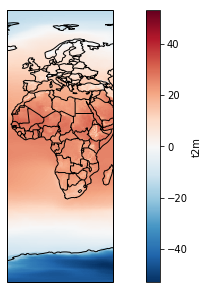

In [23]:
region = ds.t2m.mean(dim = 'time').sel(longitude = slice(-20,50)) #select all longitudes from -20° to 50°E

ax = plt.axes(projection=ccrs.PlateCarree()) 
region = region - 273.15
region.plot(ax=ax, transform=ccrs.PlateCarree()) 
ax.add_feature(cartopy.feature.BORDERS); 
ax.coastlines();
plt.xlim([-20,50]);

In [24]:
ds.t2m.latitude


<xarray.DataArray 'latitude' (latitude: 241)>
array([ 90.  ,  89.25,  88.5 , ..., -88.5 , -89.25, -90.  ], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
Attributes:
    units:      degrees_north
    long_name:  latitude

Be careful, to slice the data in the correct way: e.g. slicing the longitude via `slice(40,-20)` will not work, since the data is listed from -180 to 180°E and not from 180 to -180°E. 

However, if we have a closer look at the latitudinal coordinate axis, we see: latitude goes from 90°N to -90°S! Therefore slicing over latitudes works the following: `latitude = slice(40,-40)`!

There is another **problem** that you will encounter **when selecting**: If you try to select values across the 180°E meridian, this will not work! Let's try it:

In [25]:
ds.t2m.sel(longitude = slice(160.5,-160.5)) # we try to select from 160.5 to -160.5 --> across the 180° meridian!

<xarray.DataArray 't2m' (time: 480, latitude: 241, longitude: 0)>
array([], shape=(480, 241, 0), dtype=float32)
Coordinates:
  * longitude  (longitude) float32 
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
Attributes:
    units:      K
    long_name:  2 metre temperature

We get `longitude: 0`! Obviously this did not work. That is, because we tried to select longitude values across the borders of the coordinate axis array. This does not work.

Let's try something else:


In [26]:
ds.roll(longitude = 1)

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 480, time: 480)
Coordinates:
  * longitude  (longitude) float32 179.625 -179.625 -178.875 ... 178.125 178.875
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
Data variables:
    tp         (time, latitude, longitude) float32 0.00029367954 ... 0.0003376603
    t2m        (time, latitude, longitude) float32 244.70674 ... 249.3264
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-26 14:52:06 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...

If we now look at the longitude coordinate axis, we notice that it changed from starting at -180°E to starting from 179.25°E! We "rolled" the axes, which means we rotated all variables. This is done by the `ds.roll(dim = offset)` syntax. In our case, the dimension is the longitude axis and the offset was 1. 

We can also roll with an offset of e.g. 50:

In [27]:
ds_rolled = ds.roll(longitude = 50)
ds_rolled

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 480, time: 480)
Coordinates:
  * longitude  (longitude) float32 142.875 143.625 144.375 ... 141.375 142.125
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
Data variables:
    tp         (time, latitude, longitude) float32 0.00029367954 ... 0.0003376603
    t2m        (time, latitude, longitude) float32 244.70674 ... 249.3264
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-26 14:52:06 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...

And now try again to select longitudes from 160 to -160°E (from 160.125 to -160.125, since 160°E is not an existing coordinate):

In [33]:
ds_rolled.sel(longitude = slice(160.125,-160.125))

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 54, time: 480)
Coordinates:
  * longitude  (longitude) float32 160.125 160.875 161.625 ... -160.875 -160.125
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
Data variables:
    tp         (time, latitude, longitude) float32 0.00029367954 ... 0.0003376603
    t2m        (time, latitude, longitude) float32 244.70674 ... 249.3264
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-26 14:52:06 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...

Now it works! We solved the problem of selecting across the borders of the coordinate axis array.

One last example of selection based on the coordinate axes!
Lets plot temperature for the coordinates of Innsbruck( more or less since we have only 0.75° resolution) for the year 2018.

**Note:** If you do not want to type in the correct coordinates (e.g. you don't know if a 160.0° exist or if it is 160.5°), you can instead specify the keyword argument `method` as `nearest`. This will automatically select the values of coordinates, that are nearest to the ones you specified:


In [34]:
ibk_18 = ds.t2m.sel(time = '2018', latitude = 47, longitude = 11, method = 'nearest')-273.15 
# instead of typing 47.25 and 11.25, just type the integer value and "method = 'nearest'"
ibk_18

<xarray.DataArray 't2m' (time: 12)>
array([-2.604156, -8.454102, -2.397949,  5.461273,  8.602173, 10.979858,
       12.897522, 13.084351,  9.844757,  5.739777,  0.762299, -5.297363],
      dtype=float32)
Coordinates:
    longitude  float32 10.875
    latitude   float32 47.25
  * time       (time) datetime64[ns] 2018-01-01 2018-02-01 ... 2018-12-01

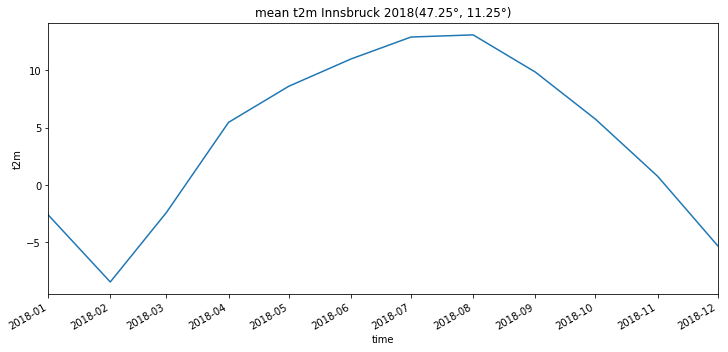

In [35]:
#This is Innsbruck! We selected three dimensions here: lat and lon of ibk and the year 2018
ibk_18.plot()
plt.title('mean t2m Innsbruck 2018(47.25°, 11.25°)');
plt.xlim(['2018-01', '2018-12']);

**Notice**, that selecting data in xarray is way easier than in numpy! When we index with numpy, we need stuff like `a[1:3:2]`,...! Now we can simply tell the array that we want all the values of a certain month or a certain latitude. If we were in a numpy environment, we would have to know, which axis is associated with e.g. the time and then tell numpy somthing similar to: `a[:,1]`. This is one of the things that make xarray so very convenient, without us even noticing it!


### Selection based on a condition

What if we are interested into air temperature on land only, and want to remove the oceans from our analyses? For this we are going to have to "mask out" the oceans grid points. First, we will need to open the "invariant" file: 

In [37]:
nc_inv = xr.open_dataset('./data/ERA5_75_invariant.nc')
nc_inv

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 480, time: 1)
Coordinates:
  * longitude  (longitude) float32 -179.625 -178.875 ... 178.875 179.625
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 1979-01-01
Data variables:
    lsm        (time, latitude, longitude) float32 ...
    wmb        (time, latitude, longitude) float32 ...
    z          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-26 14:45:41 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...

In [38]:
nc_inv.lsm

<xarray.DataArray 'lsm' (time: 1, latitude: 241, longitude: 480)>
[115680 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -179.625 -178.875 ... 178.875 179.625
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 1979-01-01
Attributes:
    units:          (0 - 1)
    long_name:      Land-sea mask
    standard_name:  land_binary_mask

In this file, all the ocean gridpoints have the value `0` and all the land gridpoints the value `1`. We will use this information, to "mask out" all the ocean values!


In [39]:
masked_t2m = ds.t2m.mean(dim = 'time').where(nc_inv.lsm == 1)

If we want to select based on a condition, we take the `.where(data == value)` syntax! Let's see what we have created:

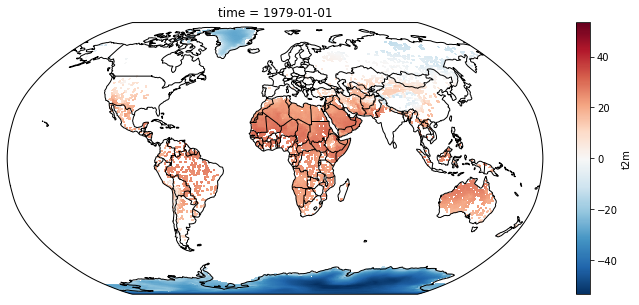

In [40]:
masked_t2m = masked_t2m - 273.15 # convert into celcius
ax = plt.axes(projection=ccrs.Robinson())
masked_t2m.plot(ax=ax, transform=ccrs.PlateCarree()) 
ax.add_feature(cartopy.feature.BORDERS); 
ax.coastlines();

### Resampling Data

Another important tool is resampling data. Resampling is the operation of changing the sampling of the data, i.e. the frequency at which it is sampled. For example you could change the sampling frequency from monthly to yearly. One of the most meaningful way to resample is to do an average, for example over the year:

In [41]:
res = ds.t2m.resample(time = 'Y').mean()
res

<xarray.DataArray 't2m' (time: 40, latitude: 241, longitude: 480)>
array([[[257.85175, 257.85175, ..., 257.85175, 257.85175],
        [257.72073, 257.71616, ..., 257.72836, 257.72485],
        ...,
        [227.27478, 227.28961, ..., 227.23247, 227.25774],
        [227.91606, 227.91606, ..., 227.91606, 227.91606]],

       [[258.78778, 258.78778, ..., 258.78778, 258.78778],
        [258.54605, 258.54266, ..., 258.55032, 258.54794],
        ...,
        [227.6455 , 227.66194, ..., 227.59908, 227.62727],
        [227.77666, 227.77666, ..., 227.77666, 227.77666]],

       ...,

       [[260.47766, 260.47766, ..., 260.47766, 260.47766],
        [260.39407, 260.39038, ..., 260.39938, 260.397  ],
        ...,
        [227.62096, 227.6358 , ..., 227.57849, 227.60394],
        [228.08629, 228.08629, ..., 228.08629, 228.08629]],

       [[261.00937, 261.00937, ..., 261.00937, 261.00937],
        [261.09885, 261.09485, ..., 261.10205, 261.1006 ],
        ...,
        [228.74635, 228.75856, ..., 228.70905, 228.7315 ],
        [229.55214, 229.55214, ..., 229.55214, 229.55214]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1979-12-31 1980-12-31 ... 2018-12-31
  * longitude  (longitude) float32 -179.625 -178.875 ... 178.875 179.625
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0

What we get from the resampling operation above is a new dataset, that hast only 36 elements in the time dimension: the 36 years from 1979 to 2014. We averaged the data for each year: `data.resample(time = 'y')` means change the frequency to yearly and `.mean()` says take the mean to get the new values! We can now either change the frequency or the operation by which we resample:

In [42]:
ds.t2m.resample(time = '5Y').mean() #new frequency: every 5 years

<xarray.DataArray 't2m' (time: 9, latitude: 241, longitude: 480)>
array([[[257.85175, 257.85175, ..., 257.85175, 257.85175],
        [257.72073, 257.71616, ..., 257.72836, 257.72485],
        ...,
        [227.27478, 227.28961, ..., 227.23247, 227.25774],
        [227.91606, 227.91606, ..., 227.91606, 227.91606]],

       [[259.16284, 259.16284, ..., 259.16284, 259.16284],
        [258.75732, 258.75494, ..., 258.75903, 258.7585 ],
        ...,
        [227.90419, 227.91771, ..., 227.86441, 227.88829],
        [228.36449, 228.36449, ..., 228.36449, 228.36449]],

       ...,

       [[259.9542 , 259.9542 , ..., 259.9542 , 259.9542 ],
        [260.03088, 260.0261 , ..., 260.038  , 260.03464],
        ...,
        [227.07597, 227.09091, ..., 227.03256, 227.05841],
        [227.48721, 227.48721, ..., 227.48721, 227.48721]],

       [[260.82437, 260.82437, ..., 260.82437, 260.82437],
        [260.84155, 260.83774, ..., 260.84622, 260.8442 ],
        ...,
        [227.61334, 227.62569, ..., 227.57552, 227.59851],
        [228.21948, 228.21948, ..., 228.21948, 228.21948]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1979-12-31 1984-12-31 ... 2019-12-31
  * longitude  (longitude) float32 -179.625 -178.875 ... 178.875 179.625
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0

Ways to change the sampling frequency: either add a number in front of the `Y` (as above), or change the `Y` e.g. to `M` for monthly sampling or `D` for daily sampling. 

In [43]:
ds.t2m.resample(time = 'Y').std() # `.std()` gives us the standard deviation instead of the mean!

<xarray.DataArray 't2m' (time: 40, latitude: 241, longitude: 480)>
array([[[11.687826, 11.687826, ..., 11.687826, 11.687826],
        [11.811886, 11.81559 , ..., 11.806322, 11.809188],
        ...,
        [ 8.730851,  8.733325, ...,  8.732267,  8.729858],
        [ 9.067708,  9.067708, ...,  9.067708,  9.067708]],

       [[10.198244, 10.198244, ..., 10.198244, 10.198244],
        [10.316946, 10.318995, ..., 10.3144  , 10.315904],
        ...,
        [ 9.001695,  9.001601, ...,  9.009204,  9.002275],
        [ 9.250687,  9.250687, ...,  9.250687,  9.250687]],

       ...,

       [[ 9.411   ,  9.411   , ...,  9.411   ,  9.411   ],
        [ 9.462255,  9.464808, ...,  9.458479,  9.460329],
        ...,
        [ 9.596622,  9.601505, ...,  9.595348,  9.593466],
        [ 9.878236,  9.878236, ...,  9.878236,  9.878236]],

       [[ 9.674623,  9.674623, ...,  9.674623,  9.674623],
        [ 9.699564,  9.701235, ...,  9.697528,  9.698215],
        ...,
        [ 9.722833,  9.727804, ...,  9.722289,  9.719481],
        [ 9.980495,  9.980495, ...,  9.980495,  9.980495]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1979-12-31 1980-12-31 ... 2018-12-31
  * longitude  (longitude) float32 -179.625 -178.875 ... 178.875 179.625
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0

Other possible operations for resampling would be: `.max()` bzw. `.min()` if you want all the maximas/minimas or `.sum()` if you want to sum up all the single values. This would make sense for precipitation in mm. 

### GroupBy: Compute monthly/seasonal Climatographies

Another way to look at time series data is to average them according to the time of year to study the annual cycle. This is done with the `.groupby()` method:

In [44]:
grouped = ds.t2m.groupby('time.month')
grouped

DataArrayGroupBy, grouped over 'month' 
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

We get a DataArray, grouped into the different months. Now we can apply an average and what we will get is the average t2m of each month over the period 1979-2014!

In [45]:
grouped.mean()

<xarray.DataArray 't2m' (month: 12, latitude: 241, longitude: 480)>
array([[[248.10135, 248.10135, ..., 248.10135, 248.10135],
        [247.85747, 247.8512 , ..., 247.86372, 247.86113],
        ...,
        [244.22249, 244.2404 , ..., 244.1853 , 244.20515],
        [245.1222 , 245.1222 , ..., 245.1222 , 245.1222 ]],

       [[247.49753, 247.49753, ..., 247.49753, 247.49753],
        [247.26018, 247.25407, ..., 247.26657, 247.26408],
        ...,
        [234.32072, 234.33798, ..., 234.2789 , 234.3027 ],
        [234.84335, 234.84335, ..., 234.84335, 234.84335]],

       ...,

       [[252.03918, 252.03918, ..., 252.03918, 252.03918],
        [251.99638, 251.98833, ..., 252.00827, 252.0035 ],
        ...,
        [236.53413, 236.54993, ..., 236.4981 , 236.51717],
        [237.3175 , 237.3175 , ..., 237.3175 , 237.3175 ]],

       [[249.54626, 249.54626, ..., 249.54626, 249.54626],
        [249.37442, 249.36797, ..., 249.3815 , 249.3787 ],
        ...,
        [244.3212 , 244.3387 , ..., 244.28435, 244.30368],
        [245.37703, 245.37703, ..., 245.37703, 245.37703]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -179.625 -178.875 ... 178.875 179.625
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

Note that with groupby, you can also compute seasonal averages:

In [46]:
ds.t2m.groupby('time.season').mean(dim='time')

<xarray.DataArray 't2m' (season: 4, latitude: 241, longitude: 480)>
array([[[248.38173, 248.38173, ..., 248.38173, 248.38173],
        [248.16399, 248.15782, ..., 248.17062, 248.16795],
        ...,
        [240.95473, 240.97224, ..., 240.9162 , 240.9372 ],
        [241.78091, 241.78091, ..., 241.78091, 241.78091]],

       [[273.33563, 273.33563, ..., 273.33563, 273.33563],
        [273.33273, 273.33362, ..., 273.33234, 273.33185],
        ...,
        [218.7628 , 218.77504, ..., 218.71954, 218.74733],
        [219.32028, 219.32028, ..., 219.32028, 219.32028]],

       [[256.0849 , 256.0849 , ..., 256.0849 , 256.0849 ],
        [256.02234, 256.0192 , ..., 256.0257 , 256.02466],
        ...,
        [222.11751, 222.13028, ..., 222.07404, 222.10175],
        [222.4201 , 222.4201 , ..., 222.4201 , 222.4201 ]],

       [[259.1064 , 259.1064 , ..., 259.1064 , 259.1064 ],
        [259.11777, 259.11224, ..., 259.12546, 259.12238],
        ...,
        [226.8154 , 226.82964, ..., 226.77484, 226.79874],
        [227.39415, 227.39415, ..., 227.39415, 227.39415]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -179.625 -178.875 ... 178.875 179.625
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'

We learned a lot about working with datasets and doing analysis. Now, let's finally move on to plotting!